In [3]:
import scipy.io as sio
Data1 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Preprocessed_Part_1.mat' )# Data1 is a dictionary whose key is 'Part_1'
Data3 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Preprocessed_Part_3.mat' )
RawData1 = sio.loadmat( 'C:/4th_2endSemester/MLBRLab/BPEstimation/data/Part_1.mat' )

In [4]:
import sys 
!{sys.executable} -m pip install numpy
#原文網址：https://kknews.cc/code/albn6qx.html
import heartpy as hp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 

In [5]:
#Data Rearrange and Merge Data1 and Data3
RearrangedData = { 'ppg':[], 'ecg':[], 'abp':[] }#Reaaranged Data1 and Data3
TempList = ['ppg', 'ecg', 'abp']
for i in range( len(Data1['preprocessed_Part_1'][0]) ):
    for j in range( len(Data1['preprocessed_Part_1'][0][0]) ):
        RearrangedData[TempList[j]].append( Data1['preprocessed_Part_1'][0][i][j] )
for i in range( len(Data3['preprocessed_Part_3'][0]) ):
    for j in range( len(Data3['preprocessed_Part_3'][0][0]) ):
        RearrangedData[TempList[j]].append( Data3['preprocessed_Part_3'][0][i][j] )

In [6]:
for i in TempList:
    print( len(RearrangedData[i]) )

6000
6000
6000


In [7]:
#get mean, max, min of RawData1
def getMeanofRawData1():
    Mean = []
    for i in range( len(RawData1['Part_1'][0]) ):
        Mean.append( np.mean( RawData1['Part_1'][0][i][0] ) )
    return Mean
def get_MinandMaxofRawData1():
    Min = []
    Max = []
    for i in range( len(RawData1['Part_1'][0]) ):
        Min.append( min( RawData1['Part_1'][0][i][0] ) )
        Max.append( max( RawData1['Part_1'][0][i][0] ) )
    return min( Min ), max( Max )
def get_StandardDeviationofRawData1():
    Sigma = []
    for i in range( len(RawData1['Part_1'][0]) ):
        Sigma.append( np.std(RawData1['Part_1'][0][i][0]) )
    return Sigma

#Declaration of Attribute Table
AttributeTable = {}
AttributeTable['Sampling_Rate'] = 125.0 #sampling rate = 125Hz
AttributeTable['Meanofppg'] = getMeanofRawData1()
AttributeTable['Sigmaofppg'] = get_StandardDeviationofRawData1()

In [8]:
AttributeTable['R-peakIndex'] = []
AttributeTable['R-peakValue'] = []
def get_peakIndex_and_peakValue_ofecg( startIndex , endIndex ):
    for i in range( len(RearrangedData['ecg'][startIndex:endIndex]) ):
        #get peak index of ecg
        temp = []
        working_data, measures = hp.process(RearrangedData['ecg'][i], 125.0)
        temp = np.append( working_data['peaklist'], working_data['removed_beats'] )
        temp = np.sort( temp )
        AttributeTable['R-peakIndex'].append( temp )
        
        #get peak value of ecg
        temp2 = []
        temp2 = np.array( temp2 )
        for j in range( len(temp) ):
            temp2 = np.append( temp2 , RearrangedData['ecg'][i][temp[j]] ) 
        AttributeTable['R-peakValue'].append(temp2)
    return
get_peakIndex_and_peakValue_ofecg(0,200)



#working_data, measures = hp.process(RearrangedData['ecg'][0], 125.0)
#hp.plotter(working_data, measures)
#working_data

C:\Anaconda3\envs\JupyterTest\lib\site-packages\scipy\interpolate\fitpack2.py:232: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)
C:\Anaconda3\envs\JupyterTest\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Anaconda3\envs\JupyterTest\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Anaconda3\envs\JupyterTest\lib\site-packages\numpy\ma\core.py:5216: RuntimeWarning: Mean of empty slice.
  dtype=dtype, **kwargs)[()]
C:\Anaconda3\envs\JupyterTest\lib\site-packages\numpy\core\fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


In [13]:
for i in range( len(AttributeTable['R-peakIndex']) ):
    print(i,' = ' , len(AttributeTable['R-peakIndex'][i]) )
    
print('=================================================================')
for i in range( len(AttributeTable['R-peakValue']) ):
    print(i,' = ' , len(AttributeTable['R-peakValue'][i]) )
    


0  =  1041
1  =  1098
2  =  1007
3  =  1170
4  =  1166
5  =  330
6  =  1253
7  =  72
8  =  35
9  =  31
10  =  17
11  =  39
12  =  16
13  =  24
14  =  471
15  =  1079
16  =  990
17  =  395
18  =  1110
19  =  67
20  =  67
21  =  11
22  =  57
23  =  64
24  =  952
25  =  50
26  =  58
27  =  68
28  =  93
29  =  86
30  =  66
31  =  37
32  =  72
33  =  91
34  =  80
35  =  1003
36  =  1014
37  =  650
38  =  210
39  =  816
40  =  971
41  =  958
42  =  151
43  =  25
44  =  82
45  =  94
46  =  912
47  =  40
48  =  53
49  =  10
50  =  150
51  =  11
52  =  56
53  =  26
54  =  13
55  =  38
56  =  12
57  =  51
58  =  24
59  =  11
60  =  12
61  =  36
62  =  146
63  =  107
64  =  927
65  =  14
66  =  1053
67  =  1391
68  =  96
69  =  38
70  =  170
71  =  364
72  =  56
73  =  1852
74  =  130
75  =  28
76  =  191
77  =  61
78  =  480
79  =  2362
80  =  1259
81  =  882
82  =  882
83  =  132
84  =  32
85  =  433
86  =  334
87  =  836
88  =  613
89  =  521
90  =  200
91  =  166
92  =  32
93  =  625
94  =  6

1000


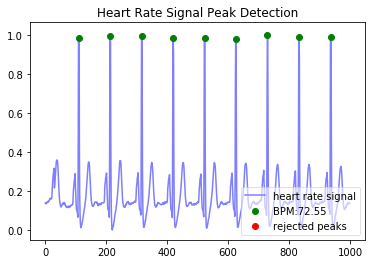

{'hr': array([0.13757803, 0.13820573, 0.13429577, 0.13941229, 0.1354657 ,
        0.14054218, 0.14107419, 0.145693  , 0.14617533, 0.14663058,
        0.14294649, 0.14745436, 0.1478203 , 0.15226489, 0.15667617,
        0.16146421, 0.16169503, 0.16188978, 0.16204772, 0.15764624,
        0.1622507 , 0.16229475, 0.17874355, 0.22105187, 0.24605534,
        0.26279786, 0.28361215, 0.29205486, 0.30868066, 0.31663535,
        0.21561392, 0.23212645, 0.25682422, 0.27737538, 0.30241364,
        0.3311178 , 0.3474565 , 0.35554176, 0.35907462, 0.35846747,
        0.35372172, 0.33620597, 0.30181089, 0.26328181, 0.22884214,
        0.19849362, 0.16812713, 0.1508993 , 0.13735697, 0.13243509,
        0.12298078, 0.12215079, 0.11720337, 0.12458403, 0.12374036,
        0.12741809, 0.13479703, 0.13395764, 0.1372345 , 0.13229696,
        0.14011241, 0.13930619, 0.13851301, 0.13321274, 0.13697304,
        0.12759691, 0.12687367, 0.12206123, 0.12138288, 0.11661835,
        0.1201017 , 0.11539073, 0.11481934

In [16]:
print( len(RearrangedData['ecg'][96]) )
print('==================================================================')
working_data, measures = hp.process(RearrangedData['ecg'][96], 125.0)
hp.plotter(working_data, measures)
working_data

In [17]:
AttributeTable['systolicIndex'] = []
AttributeTable['systolicValue'] = []
def get_peakIndex_and_peakValue_ofppg( startIndex , endIndex ):
    for i in range( len(RearrangedData['ppg'][startIndex:endIndex]) ):
        #get peak index of ppg
        temp = []
        working_data, measures = hp.process(RearrangedData['ppg'][i], 125.0)
        temp = np.append( working_data['peaklist'], working_data['removed_beats'] )
        temp = np.sort( temp )
        AttributeTable['systolicIndex'].append( temp )
        
        #get peak value of ppg
        temp2 = []
        temp2 = np.array( temp2 )
        for j in range( len(temp) ):
            temp2 = np.append( temp2 , RearrangedData['ppg'][i][temp[j]] ) 
        AttributeTable['systolicValue'].append(temp2)
    return
get_peakIndex_and_peakValue_ofppg(0,200)

In [18]:
for i in range( len(AttributeTable['systolicIndex']) ):
    print(i,' = ' , len(AttributeTable['systolicIndex'][i]) )
    
print('=================================================================')
for i in range( len(AttributeTable['systolicValue']) ):
    print(i,' = ' , len(AttributeTable['systolicValue'][i]) )
    

0  =  1006
1  =  980
2  =  782
3  =  1103
4  =  1010
5  =  306
6  =  1045
7  =  58
8  =  29
9  =  15
10  =  16
11  =  30
12  =  15
13  =  8
14  =  412
15  =  1020
16  =  947
17  =  334
18  =  860
19  =  22
20  =  22
21  =  11
22  =  52
23  =  62
24  =  902
25  =  50
26  =  50
27  =  60
28  =  75
29  =  76
30  =  63
31  =  37
32  =  63
33  =  74
34  =  74
35  =  929
36  =  920
37  =  610
38  =  203
39  =  759
40  =  907
41  =  919
42  =  138
43  =  24
44  =  75
45  =  87
46  =  852
47  =  10
48  =  47
49  =  12
50  =  132
51  =  11
52  =  48
53  =  22
54  =  12
55  =  35
56  =  12
57  =  48
58  =  24
59  =  12
60  =  11
61  =  37
62  =  145
63  =  54
64  =  429
65  =  14
66  =  1007
67  =  1114
68  =  60
69  =  29
70  =  104
71  =  184
72  =  24
73  =  1069
74  =  59
75  =  15
76  =  118
77  =  29
78  =  237
79  =  1090
80  =  1074
81  =  880
82  =  880
83  =  109
84  =  33
85  =  121
86  =  275
87  =  600
88  =  571
89  =  426
90  =  48
91  =  40
92  =  8
93  =  621
94  =  659
95  =  6

1000


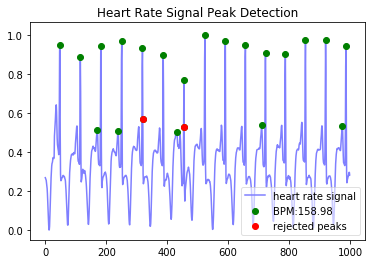

{'hr': array([2.68405655e-01, 2.64063291e-01, 2.59240038e-01, 2.54840560e-01,
        2.40916002e-01, 2.27415867e-01, 2.13436138e-01, 1.85862576e-01,
        1.43791334e-01, 1.11643725e-01, 6.99744894e-02, 2.82813980e-02,
        1.32402551e-04, 0.00000000e+00, 1.83883852e-02, 5.98210671e-02,
        1.15254620e-01, 1.70671116e-01, 2.21549602e-01, 2.67439284e-01,
        2.99749229e-01, 3.27073431e-01, 3.40821062e-01, 3.45063883e-01,
        3.53822835e-01, 3.67551892e-01, 3.71781358e-01, 3.66965271e-01,
        3.66672472e-01, 3.70904811e-01, 4.81868941e-01, 5.09176414e-01,
        5.36944553e-01, 5.64270776e-01, 6.01106099e-01, 6.33433148e-01,
        6.42259966e-01, 6.04976704e-01, 5.40126739e-01, 4.70775754e-01,
        4.38078734e-01, 4.23948025e-01, 4.14818264e-01, 4.05264233e-01,
        3.86695026e-01, 4.14736836e-01, 6.18277624e-01, 9.19534545e-01,
        9.51747434e-01, 4.98297585e-01, 2.85473170e-01, 2.53128121e-01,
        2.53382963e-01, 2.58652253e-01, 2.68032230e-01, 2.

In [19]:
print( len(RearrangedData['ppg'][13]) )
print('==================================================================')
working_data, measures = hp.process(RearrangedData['ecg'][13], 125.0)
hp.plotter(working_data, measures)
working_data